# APS 1 - grupo 9

Imports

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

Parametros iniciais

In [2]:
#DADOS
l = 0.2 #metros
D = 0.24 #metros
r = D/2 #metros
p = math.pi * 2*r  #metros
ab = math.pi*r**2 #metros
h = 25 #W/m^2.K
k = 240 #W/m.K
Tinf =  273+25 #K
Tb = 373 #K
m = math.sqrt((h*p)/(k*ab)) #m^2/s 

## Questão 1

### Ex1

Temperatura na extremidade da aleta =  369.02 K


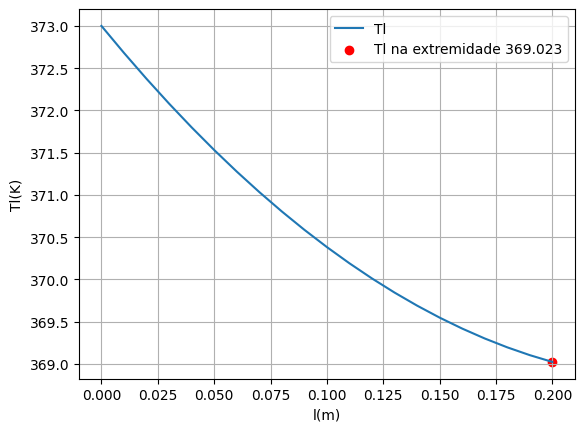

In [3]:
theta = math.cosh(0) + (h/(m*k))*math.sinh(0)

thetab= math.cosh(m*l) + (h/(m*k))*math.sinh(m*l)

delta = theta/thetab
# print(theta)
# print(thetab)
# print(math.cosh(m*l))
# print(delta)

Tl = delta*(Tb-Tinf) + Tinf
print("Temperatura na extremidade da aleta = ",round(Tl, 2),"K")

# Calculando a distribuicao
listaTl = []
for x in np.arange(0,0.21,0.01):
    theta= math.cosh(m*(l-x)) + (h/(m*k))*math.sinh(m*(l-x))
    delta = theta/thetab
    Tl = delta*(Tb-Tinf) + Tinf
    listaTl.append(Tl)


plt.figure()
plt.plot(np.arange(0,0.21,0.01),listaTl)
plt.scatter(0.2,Tl, color="red")


plt.legend(["Tl",f"Tl na extremidade {Tl:0.3f}"])
plt.grid()
plt.xlabel("l(m)")
plt.ylabel("Tl(K)")

plt.show()

### Ex2


In [4]:

M = (Tb - Tinf)*(math.sqrt(h*p*k*ab))
print("M = ",round(M, 2))

qa = M*((math.sinh(m*l) + (h/(m*k))*math.cosh(m*l))/(math.cosh(m*l) + (h/(m*k))*math.sinh(m*l)))

print("Taxa de transferencia de calor (qa) = ",round(qa, 2))

M =  1072.94
Taxa de transferencia de calor (qa) =  353.99


### Ex3

In [5]:
As = ab + (2 * math.pi * (D/2)) * l # area da superficie
eficiencia = qa/(h*As*(Tb-Tinf))

print("eficiencia da aleta= ",round(eficiencia*100, 2), "%")

eficiencia da aleta=  96.31 %


### Ex4


In [6]:
efetividade = qa/(h*ab*(Tb-Tinf))
print("efetividade da aleta = ", round(efetividade, 2))

efetividade da aleta =  4.17


### Ex5

In [7]:
#para aleta infinita qa = a M
qa_infinita = M
print("Taxa de transferencia de calor na aleta infinita (qa_inf) = ",round(qa_infinita, 2))

Taxa de transferencia de calor na aleta infinita (qa_inf)=  1072.94


### Ex6

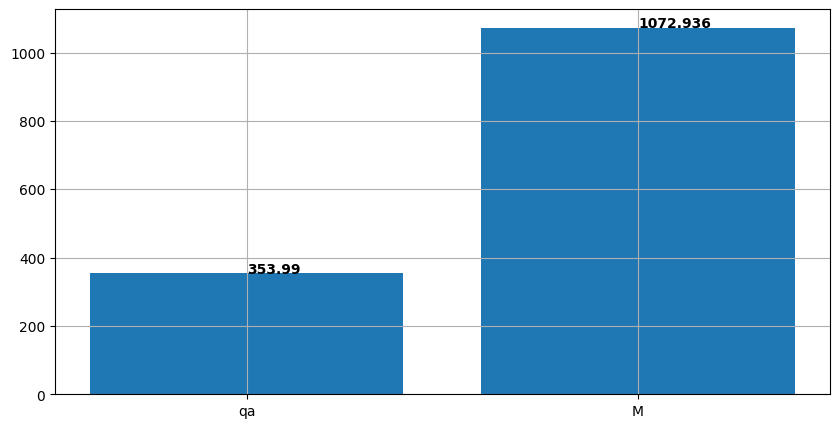

comparacao qa/qa_infinita =  32.99 %


In [8]:
def compara(a, b):
    nomes = ['qa', 'M']
    valores = [a, b]

    plt.figure(figsize=(10, 5))
    plt.bar(nomes, valores)

    for i, v in enumerate(valores):
        plt.text(i, v + 0.1, str(round(v, 3)), color='black', fontweight='bold') # round the value to 3 decimal places

    plt.grid()
    plt.show()

compara(qa,qa_infinita)
compararacao = qa/qa_infinita
print("comparacao qa/qa_infinita = ",round(compararacao*100, 2), "%")

### Ex7

In [9]:
l = 0.001
tole = 0.001
erro = 1
while (erro > tole):
    qa = M*((math.sinh(m*l) + (h/(m*k))*math.cosh(m*l))/(math.cosh(m*l) + (h/(m*k))*math.sinh(m*l)))
    q_inf = M
    erro = abs((qa - q_inf)/q_inf)
    l += 0.001

print("tamanho da aleta para ser igual a hipotese da aleta infinita = ",round(l, 2), "m")	


tamanho da aleta para ser igual a hipotese da aleta infinita =  2.83 m


## Questão 2

### Ex1

In [10]:
def calcula_k_aleta_infinita(Tb, TA, TB, Tinf, h, p, ab, ka):
    theta_A = (TA - Tinf)
    theta_B = (TB - Tinf)
    theta_b = (Tb - Tinf)
    m = math.sqrt((h*p)/(ka*ab))
    x = math.log(theta_A/theta_b)/(-m)
    kb = ((h*p)/ab)*(1/((math.log(theta_A/theta_B)/x)+ math.sqrt((h*p)/(ka*ab)))**2)
    return kb

### Ex2

Condições iniciais 

In [11]:
ka = 240
TA = 273 + 75
TB = 273 + 60
Tb = 273 + 100
Tinf = 273 + 25
ab = math.pi*r**2 
p = math.pi * 2*r  
h = 25 

In [12]:
kb = calcula_k_aleta_infinita(Tb, TA, TB, Tinf, h, p, ab, ka)
print("kb da aleta infinita = ",round(kb, 2), "W/m.K")

kb da aleta infinita =  67.93 W/m.K
